In [25]:
import fiona
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#from descartes import PolygonPatch

from matplotlib import pyplot as plt
import gdal

In [26]:
# building shape file
shape_file = '/Users/sukryool.kang/Projects/Geospatial Project/Data_For AI Team/LA__Road_Ground_truth/Vector_LA1-32-33-35-36-37/LA1-32-33-35-36-37.shp'

#road shape file
shape_file = '/Users/sukryool.kang/data/GIS_data/LosAngeles_2017/Phase 1 Road Polygon/Phase 1 Road Polygon.shp'
shape_file = '/Users/sukryool.kang/data/GIS_data/Sample_Training_Data/Road_Shapefiles/Roads_Groundtruth_S-28 to S-32.shp'

#shape_file = '/Users/sukryool.kang/data/GIS_data/QGIS_polygontest/road2.shp'

shape_file = '/Users/sukryool.kang/data/GIS_data/Road/Shapefiles/Roads_Groundtruth_S-59 to S-69.shp'

In [27]:
def listIndex(points):
    
    #find the last list index
    
    #tmp = points
    idx = 0
    while isinstance(points,list):
        points=points[0]
        idx = idx + 1
    return idx-2

In [28]:
def pointInsideImage(points,x_range,y_range):

    for each_poly in points:
        for each_pt in each_poly:
            if (x_range[0] <= each_pt[0]) and (each_pt[0] <= x_range[1]) and (y_range[0] <= each_pt[1]) and (each_pt[1] <= y_range[1]):
                return True
    return False

In [29]:
def convert_polygon_to_roadmask(gis_image_file, shape_file, output_file):

    ######################################################
    # Extract reference coordinates from gis_image_file
    ######################################################
    src_ds = gdal.Open(gis_image_file, gdal.GA_ReadOnly)
    gio_transform = src_ds.GetGeoTransform()
    cols = src_ds.RasterXSize
    rows = src_ds.RasterYSize
    bands = src_ds.RasterCount
    driver = src_ds.GetDriver().LongName

    # close dataset
    src_ds = None

    # In a north up image, padfTransform[1] is the pixel width, and padfTransform[5] is the pixel height.
    # The upper left corner of the upper left pixel is at position (padfTransform[0],padfTransform[3]).
    top_left = [gio_transform[0],gio_transform[3]]
    bottom_right = [gio_transform[0] + cols*gio_transform[1],gio_transform[3]+rows*gio_transform[5]]
    pixel_size = [gio_transform[1], gio_transform[5]]


    #building_value = 255
    road_value = 255
    
    ##########################
    #load shape shape_file
    ##########################
    gt_shape = fiona.open(shape_file)

    x_range = [top_left[0],bottom_right[0]]
    y_range = [bottom_right[1],top_left[1]]

    road_insert = []
    road_delete = []  # hole (Polygon inside Polygon)
    
    for idx,feat in enumerate(gt_shape):
        # To-Do: Expand the coverage including other geo-data
        if feat['geometry'] == None:
            continue
        #print(feat)
        if feat['geometry']['type'] is 'MultiPolygon':
            
            points = feat['geometry']['coordinates'] 
            
            for each_point in points:
                
                road_insert.append(convertPoint(each_point[0],gio_transform))
                for idx in range(1,len(each_point)):
                    road_delete.append(convertPoint(each_point[idx],gio_transform))
                
        elif feat['geometry']['type'] is 'Polygon':
            
            points = feat['geometry']['coordinates'] 
            
            road_insert.append(convertPoint(points[0],gio_transform))
            for idx in range(1,len(points)):
                road_delete.append(convertPoint(points[idx],gio_transform))            
 

    road_filename = output_file[:-4] + "_road" + output_file[-4:]

    img_road = np.zeros((rows, cols), dtype=np.uint8)

    if road_insert:
        cv2.fillPoly(img_road,road_insert,(road_value))
        cv2.fillPoly(img_road,road_delete,(0))
        cv2.imwrite(road_filename, img_road)

    building_check = False
    road_check = False

    if building_insert:
        building_check = True

    if road_insert:
        road_check = True

    #print("Success: " + output_file + " was created.")

    return building_check, road_check


In [8]:
def polyIncludePoly(points1, points2):

    polygon1 = Polygon(points1)
    polygon2 = Polygon(points2)
    prime_idx = 0
    if polygon1.area >= polygon2.area:
        prime_idx = 0
        secondary_idx = 1
        included = True

        for each_point in points2:
            if not polygon1.contains(Point(each_point)):
                included = False
                break
    else:
        prime_idx = 1
        secondary_idx = 0
        included = True

        for each_point in points1:
            if not polygon2.contains(Point(each_point)):
                included = False
                break

    return prime_idx, secondary_idx, included

In [78]:
gt_shape = fiona.open(shape_file)

for idx,feat in enumerate(gt_shape):
    feature = feat['geometry']['coordinates']
#     print(idx,len(feature))
    for each_feat in feature:
        print(idx, len(each_feat))

0 1
0 264
1 25
2 5
3 22
4 25
5 8
6 26
7 1
7 1
7 2
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
8 1
8 1
8 1
8 1
8 1
8 1
9 5
10 5
11 7
12 5
13 24
14 45
15 4
16 13
17 60
18 13
19 5090
19 29
19 54
19 5
19 77
19 5
19 4
19 4
19 4
19 161
19 49
19 288
19 146
19 111
19 35
19 107
19 32
19 36
19 55
19 237
19 70
19 46
19 19
19 17
19 27
19 32
19 78
19 25
19 24
19 87
19 37
19 11
19 47
19 39
19 63
19 23
19 13
19 72
19 34
19 77
19 60
19 36
19 22
19 39
19 135
19 31
19 30
19 17
19 56
19 39
19 202
19 40
19 12
19 24
19 90
19 21
19 23
19 28
19 23
19 41
19 22
19 19
19 24
19 11
19 41
19 36
19 29
19 46
19 54
19 30
19 44
19 39
19 16
19 9
19 76
19 54
19 67
19 67
19 11
19 21
19 19
19 63
19 38
19 31
19 26
19 37
19 29
19 23
19 23
19 27
19 18
19 61
19 30
19 37
19 42
19 51
19 153
19 5
19 44
19 11
19 33
19 25
19 26
19 40
19 46
19 29
19 25
19 30
19 51
19 66
19 72
19 39
19 44
19 22
19 193
19 18
19 21
19 17
19 34
19 18
19 27
19 23
19 25
19 28
19 17
19 91
19 52
19 56
19 39
19 30
19 13
19 32
19 40
19 26
19 43
19 35
19 39
19 31
19 22
1

In [10]:
print(len(gt_shape))

8


In [53]:
points0 = gt_shape[0]['geometry']['coordinates']
points1 = gt_shape[1]['geometry']['coordinates']
points2 = gt_shape[2]['geometry']['coordinates']
points3 = gt_shape[3]['geometry']['coordinates']
points4 = gt_shape[4]['geometry']['coordinates']
points5 = gt_shape[5]['geometry']['coordinates']
points6 = gt_shape[6]['geometry']['coordinates']
points7 = gt_shape[7]['geometry']['coordinates']
points19 = gt_shape[19]['geometry']['coordinates']
ring_patch1 = PolygonPatch(Polygon(points0))
ring_patch2 = PolygonPatch(Polygon(points1))
print(len(points))

NameError: name 'PolygonPatch' is not defined

In [61]:
Polygon(points19[0][0])

TypeError: object of type 'float' has no len()

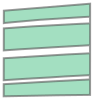

In [13]:
Polygon(points1[0])

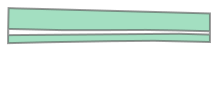

In [14]:
Polygon(points3[0])

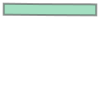

In [15]:
Polygon(points4[0])

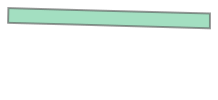

In [16]:
Polygon(points5[0])

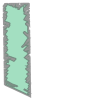

In [80]:
Polygon(points19[0])

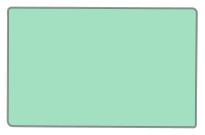

In [18]:
Polygon(points6[0][350])

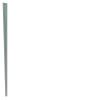

In [19]:
Polygon(points6[2][0])

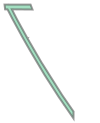

In [20]:
Polygon(points6[0][3])

In [24]:

gis_image_file = "/Users/sukryool.kang/data/GIS_data/Road/Series S-28 to S-32/Images/000032_000095-RGB-7cm.tif" 
shape_file = '/Users/sukryool.kang/data/GIS_data/Sample_Training_Data/Road_Shapefiles/Roads_Groundtruth_S-28 to S-32.shp'
output_file = 'test.png'
convert_polygon_to_roadmask(gis_image_file, shape_file, output_file)



NameError: name 'convertPoint' is not defined

In [51]:
print(gt_shape[19])

{'type': 'Feature', 'id': '19', 'properties': OrderedDict([('ÿþ', None), ('ÿþ_1', None), ('ÿþ_2', None), ('ÿþ_3', None), ('ÿþ_4', None), ('ÿþ_5', None), ('ÿþ_6', None), ('ÿþ_7', None), ('ÿþ_8', None), ('ÿþ_9', None), ('ÿþ10', None), ('ÿþ11', None)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(-118.26702676573473, 34.08593990211475), (-118.26691269705577, 34.08594107727035), (-118.26703552131913, 34.085743946066), (-118.26713462046554, 34.085585733026534), (-118.26731124127886, 34.08529519408901), (-118.26732068183944, 34.08527944126045), (-118.26740300571885, 34.08514207266788), (-118.26749484786338, 34.08500181909562), (-118.26760123635796, 34.0848571081029), (-118.26761033997438, 34.08484416298338), (-118.26763228646347, 34.084812955594984), (-118.26765328312024, 34.08478450870235), (-118.26765688183495, 34.084771867435244), (-118.26765359410388, 34.0847623655161), (-118.26764887319251, 34.08474872153772), (-118.26764680793507, 34.08474275270398), (-118.26764464686738, 34.0847

In [66]:
print(gt_shape[0])

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('ÿþ', None), ('ÿþ_1', None), ('ÿþ_2', None), ('ÿþ_3', None), ('ÿþ_4', None), ('ÿþ_5', None), ('ÿþ_6', None), ('ÿþ_7', None), ('ÿþ_8', None), ('ÿþ_9', None), ('ÿþ10', None), ('ÿþ11', None)]), 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[(-118.25031081936392, 34.02189418891751), (-118.25031010049418, 34.0218446367348), (-118.25031012505787, 34.021844632743374), (-118.25031853330898, 34.02184548712342), (-118.25032621295426, 34.021848463184774), (-118.25126143123242, 34.02237287093738), (-118.25126763062542, 34.02237767731301), (-118.25127174284779, 34.0223838435821), (-118.25127336536626, 34.0223907661475), (-118.25127233935683, 34.022397767380376), (-118.25126876525184, 34.02240416195122), (-118.25126299290918, 34.02240932391472), (-118.25125558736588, 34.022412747981654), (-118.25124727352846, 34.022414098980256), (-118.25123886521381, 34.02241324466527), (-118.25123118548697, 34.02241026866306), (-118.25031081936392,

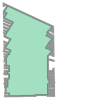

In [77]:
Polygon(points0[1][0])